#### **Imports**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt

#### **Creating and playing with quantum objects**

For example, let us manually create one of the Pauli matrices.

In [3]:
q = qt.Qobj([[0, 1], [1, 0]])
q

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

This has the same result as calling the built-in function.

In [4]:
qt.sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

We can have QuTiP tell us the attributes of a certain quantum object. For example, let us see what type of quantum object this is.

In [5]:
q.type

'oper'

It is an operator. But is it hermitian?

In [6]:
q.isherm

True

It is. There are many other attributes and methods of the quantum object we are able to call. These are some more:

In [22]:
print(q.shape, "\n\n"           # returns the shape of the object
,q.isunitary,"\n\n"             # returns whether the object is unitary
,q.isbra, "\n\n"                # returns whether the object is a bra
,q.eigenenergies(), "\n\n"      # returns the eigenvalues of the object
,q.tr() )                       # returns the trace of the object

(2, 2) 

 True 

 False 

 [-1.  1.] 

 0.0


QuTiP also allows us to use mathematical operations with them.

In [19]:
q + 2*q

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 3.]
 [3. 0.]]

In [20]:
q ** 3

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [21]:
q.expm() # is a QuTiP method which returns e raised to the power of the quantum object.

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1.54308063 1.17520119]
 [1.17520119 1.54308063]]

Frequently used quantum objects are defined within QuTiP, so we can call it right away:

In [27]:
print(
    
qt.destroy(2),        # is the annihilation operator

"\n\n",

qt.sigmaz(),         # is one of the Pauli matrices

"\n\n",

qt.basis(2, 0),          # is an orthonormal basis state

"\n\n",

qt.commutator(q, q)     # returns the commutator of two operators

)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]] 

 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]] 

 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]] 

 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 0.]]


We can also build quantum objects for composite systems:

In [35]:
print(sz1 := qt.tensor(qt.sigmaz(), qt.qeye(2)),"\n\nis an operator we can use in a two-qubit system to have sigma_z act only on the first qubit.\n\n") 


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]] 

is an operator we can use in a two-qubit system to have sigma_z act only on the first qubit.




In [36]:

print(psi_1 := qt.tensor(qt.basis(2,1), qt.basis(2,0)), "\n\nrepresents the excited first qubit.\n\n")
print(psi_2 := qt.tensor(qt.basis(2,0), qt.basis(2,1)), "\n\nrepresents the excited second qubit.\n\n")

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]] 

represents the excited first qubit.


Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]] 

represents the excited second qubit.




In [37]:
print(sz1 * psi_1, "\n\n changes the first qubit\n\n")

print(sz1 * psi_2, "\n\n but leaves the second qubit invariant.")

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [-1.]
 [ 0.]] 

 changes the first qubit


Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]] 

 but leaves the second qubit invariant.


The Hamiltonian is, of course, a quantum object. For example let us make the Hamiltonian representing Nuclear Quadrupole Resonance of a spin-1 nucleus:
$$
\mathcal{H} = \frac{e^2qQ}{4}\left[3I_z^2-I^2+\eta(I_x^2-I_y^2)\right]
$$
Here $e^2qQ$ is known as the quadrupole coupling constant and $\eta$ is called the asymmetry parameter.

In [40]:
I_x, I_y, I_z = qt.jmat(1) # makes the spin-1 operators

# The Hamiltonian is then simply
factor = 1 # for the factor at the front
eta = 1

Ham = factor * (3 * I_z ** 2 - (I_x ** 2 + I_y ** 2 + I_z ** 2) + eta * (I_x ** 2 - I_y ** 2))

Ham

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 1.  0.  1.]
 [ 0. -2.  0.]
 [ 1.  0.  1.]]

#### **Trying out a unitary dynamics**

Let us take a look at the oscillation of the expectation value of a superposition state of a single qubit under a simple Hamiltonian:

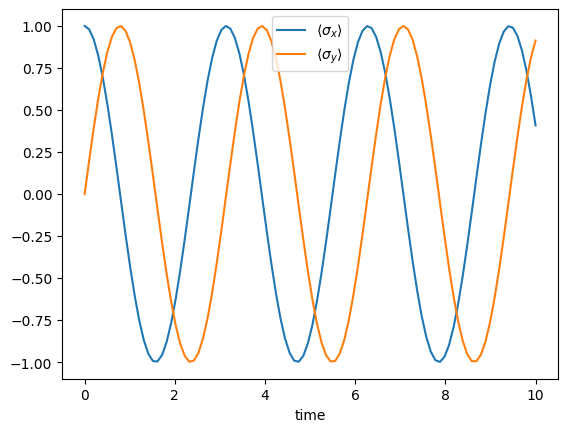

In [44]:
Ham = qt.sigmaz()  # can be realized, for example, with a magnetic field along the axis of quantization forming a Larmor frequency of 1 on a system of NMR qubit.

# The initial state would be the superposition state
psi0 = (qt.basis(2,0) + qt.basis(2,1)).unit()  # The method normalizes our state

timelst = np.linspace(0, 10, 100)

result = qt.mesolve(Ham, psi0, timelst).states # solves the master equation equation for the system and take the states.
                                               # Without any collapse operator, this is equivalent to [sesolve] which solves the Schroedinger equation.

exp_sx = qt.expect(qt.sigmax(), result)     # gets the expectation values for sigma_x
exp_sy = qt.expect(qt.sigmay(), result)     # and for sigma_y

# Equivalently we can write qt.mesolve(Ham, psi0, timelst, [], [exp_sx, exp_sy])

# Plotting
plt.plot(timelst, exp_sx, label = r"$\left\langle\sigma_x\right\rangle$")
plt.plot(timelst, exp_sy, label = r"$\left\langle\sigma_y\right\rangle$")
plt.legend(loc = "best")
plt.xlabel("time")
plt.show()

#### **Dissipative (non-unitary) dynamics**

Another example, we consider a quantum harmonic oscillator which loses photons to the environment with a certain relaxation rate. 

In [46]:
w = 1 # is the oscilaltor frequency
k = 0.1 # is the relaxation rate
a = qt.destroy(20) 

rho0 = qt.fock_dm(20, 10) # We make a Fock density matrix which says that there are 10 photons initially.

# The Hamiltonian
Ham = w * a.dag() * a # .dag() takes the hermitian conjugate

# The collapse operator
col = np.sqrt(k) * a

timelst = np.linspace(0, 100, 100)

result = qt.mesolve(Ham, rho0, timelst, [col], [a.dag() * a])
                                              # is the number operator

plt.plot(timelst, result.expect[0])
                # gets the expectation value from a mesolve call
plt.xlabel("time")
plt.ylabel("photon number")
plt.show()

NameError: name 'tlist' is not defined